## tf.image.crop_and_resize

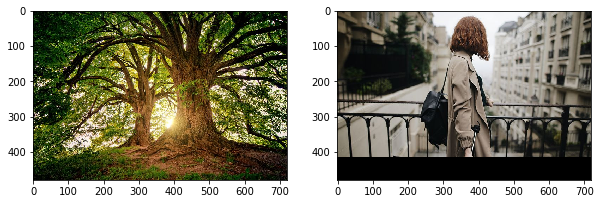

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import transform
# 加载图像
img1=plt.imread(os.path.join(os.path.dirname(os.getcwd()),'pics','1.jpg'))
img2=plt.imread(os.path.join(os.path.dirname(os.getcwd()),'pics','2.jpg'))
# 转为相同的维度
shape=min(img1.shape,img2.shape)
img1=transform.resize(img1,shape[:2],order=1, mode='constant', cval=0, clip=True, preserve_range=False,anti_aliasing=False, anti_aliasing_sigma=None)
img2=transform.resize(img2,shape[:2],order=1, mode='constant', cval=0, clip=True, preserve_range=False,anti_aliasing=False, anti_aliasing_sigma=None)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)  # 一行两列展示
plt.imshow(img1)
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.show()

In [3]:
def image_show(crop):
    plt.figure(figsize=(10,10))
    for i in range(len(crop)):
        plt.subplot(1, len(crop), i+1)  # 一行多列展示
        plt.imshow(crop[i])
    plt.show()

a) box_ind指定的是batch索引号，也就是裁剪哪个图像

b) boxes 指定边框坐标是归一化的坐标;如果y1>y2或者x2>x1代表翻转的顺序；如果坐标大于1，表示padding;如y1=0.5,y2=1.1表示底部padding (1.1-1.0)/(1.1-0.5)=1/6 

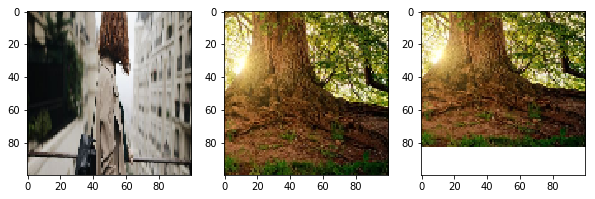

In [5]:
import tensorflow as tf
image=np.stack([img1,img2],axis=0)
crop = tf.image.crop_and_resize(image, boxes=[[0.1, 0.1, 0.6, 0.9], 
                                        [0.5, 0.5, 1.0, 0.9], 
                                        [0.5, 0.5, 1.1, 0.9]],
                                 box_ind=[1, 0, 0], crop_size=[100, 100])
sess = tf.Session()
crop = crop.eval(session=sess)
image_show(crop)

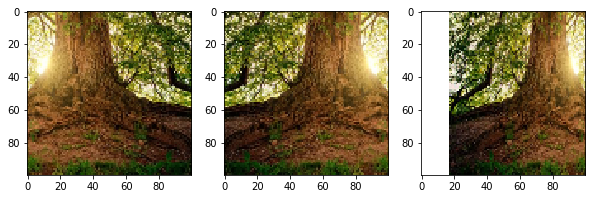

In [5]:
crop = tf.image.crop_and_resize(image, boxes=[[0.5, 0.5, 1.0, 0.9], 
                                              [0.5, 0.9, 1.0, 0.5], 
                                              [0.5, 1.1, 1.0, 0.5]],
                                 box_ind=[0, 0, 0], crop_size=(100, 100))
sess = tf.Session()
crop = crop.eval(session=sess)
image_show(crop)

In [6]:
# 看到宽度有17个像素为0；约1/6是padding
crop[2][0][:18]

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.16249597, 0.25767857,

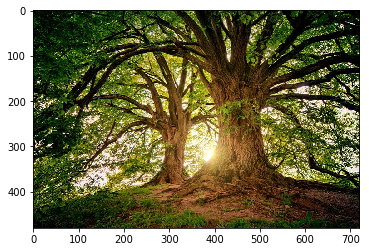

In [7]:
plt.imshow(img1)
plt.show()

D:\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


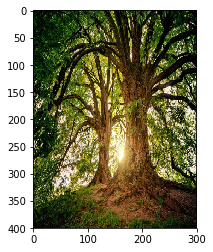

In [13]:
img1=plt.imread(os.path.join(os.path.dirname(os.getcwd()),'pics','1.jpg'))
x=transform.resize(img1,(400,300),preserve_range=True)
plt.imshow(x.astype(np.uint8))  # preserve_range=True,必须转换数据类型到原来的类型
plt.show()

In [9]:
x=transform.resize(img1,(400,300),order=1, mode='constant', cval=0, clip=True, preserve_range=True)
y=transform.resize(img1,(400,300),order=1, mode='constant', cval=0, clip=True, preserve_range=False)
np.max(x),np.min(x),np.mean(x),np.max(y),np.min(y),np.mean(y)

D:\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(255.0, 0.0, 114.1846817465278, 1.0, 0.0, 0.4477830656726581)

In [18]:
x=tf.meshgrid(tf.range(3),tf.range(5))
a=sess.run(x)
a

[array([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]), array([[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2],
        [3, 3, 3],
        [4, 4, 4]])]

In [21]:
a[0].shape

(5, 3)

In [10]:
import tensorflow as tf
image=np.stack([img1,img2],axis=0)
#box=tf.constant([])
#box=tf.reshape(box,[0,4])
crop = tf.image.crop_and_resize(image, boxes=[[0.5, 0.5, 1.0, 0.9]],
                                 box_ind=[0], crop_size=[0, 100])
sess = tf.Session()
crop = crop.eval(session=sess)
image_show(crop)

InvalidArgumentError: crop dimensions must be positive
	 [[Node: CropAndResize_6 = CropAndResize[T=DT_DOUBLE, extrapolation_value=0, method="bilinear", _device="/job:localhost/replica:0/task:0/device:CPU:0"](CropAndResize_6/image, CropAndResize_6/boxes, CropAndResize_6/box_ind, CropAndResize_6/crop_size)]]

Caused by op 'CropAndResize_6', defined at:
  File "d:\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "d:\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "d:\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "d:\anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "d:\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "d:\anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "d:\anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "d:\anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "d:\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "d:\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "d:\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "d:\anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "d:\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "d:\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "d:\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "d:\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "d:\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "d:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "d:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "d:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-b9e07eedde68>", line 6, in <module>
    box_ind=[0], crop_size=[0, 100])
  File "d:\anaconda3\lib\site-packages\tensorflow\python\ops\gen_image_ops.py", line 402, in crop_and_resize
    extrapolation_value=extrapolation_value, name=name)
  File "d:\anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "d:\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3414, in create_op
    op_def=op_def)
  File "d:\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1740, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): crop dimensions must be positive
	 [[Node: CropAndResize_6 = CropAndResize[T=DT_DOUBLE, extrapolation_value=0, method="bilinear", _device="/job:localhost/replica:0/task:0/device:CPU:0"](CropAndResize_6/image, CropAndResize_6/boxes, CropAndResize_6/box_ind, CropAndResize_6/crop_size)]]


## 保持长宽比缩放

In [8]:
img1.shape

(480, 720, 4)

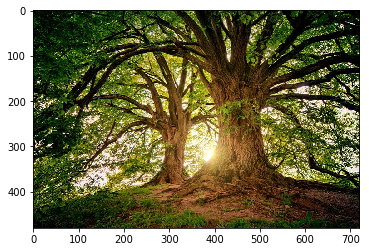

In [10]:
plt.imshow(img1)
plt.show()

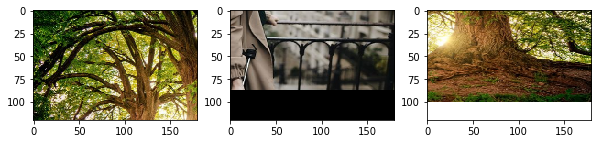

In [16]:
import tensorflow as tf
image=np.stack([img1,img2],axis=0)
crop = tf.image.crop_and_resize(image, boxes=[[0.1, 0.1, 0.6, 0.6], 
                                        [0.5, 0.5, 1.0, 0.9], 
                                        [0.5, 0.5, 1.1, 0.9]],
                                 box_ind=[0, 1, 0], crop_size=[120, 180])
cr = tf.pad(crop[0],[[10,20],[0,0],[0,0]])
sess = tf.Session()
crop = crop.eval(session=sess)
cr = cr.eval(session=sess)
image_show(crop)

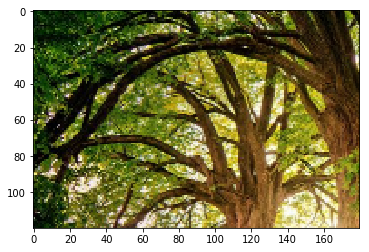

In [14]:
plt.imshow(crop[0])
plt.show()

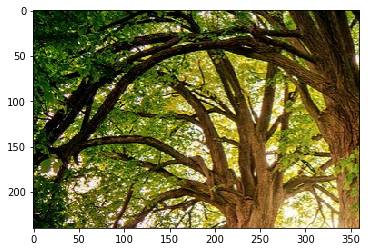

In [17]:
plt.imshow(img1[48:48*6,72:72*6])
plt.show()

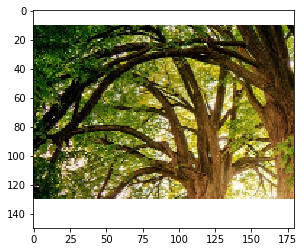

In [18]:
plt.imshow(cr)
plt.show()